In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# create a likelihood function
def likelihood(x, mu):
    return np.prod(norm.pdf(x, loc=mu, scale=1))

# create a log-likelihood function
def log_likelihood(x, mu):
    return np.sum(norm.logpdf(x, loc=mu, scale=1))  # use logpdf for numerical stability
# create a range of mu values

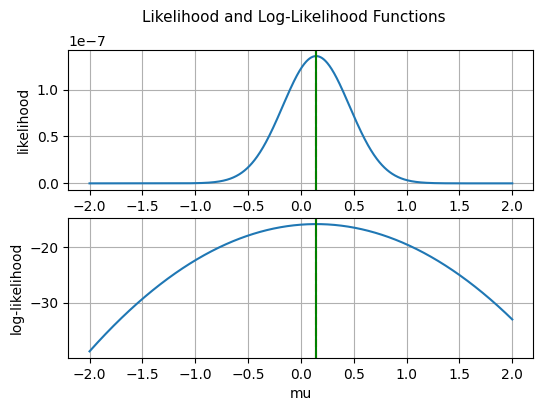

In [3]:
# generate n samples from a Gaussian distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set parameters
mu = 0      # mean
sigma = 1   # standard deviation
n = 10    # number of samples

# Generate samples
x = norm.rvs(loc=mu, scale=sigma, size=n)

mu_values = np.linspace(-2, 2, 1000)

# calculate the likelihood for each mu value
likelihood_values = [likelihood(x, mu) for mu in mu_values]
log_likelihood_values = [log_likelihood(x, mu) for mu in mu_values]

# plot the likelihood function and log-likelihood function in a 1x2 subplot

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 4))

ax[0].plot(mu_values, likelihood_values)
# add super title
fig.suptitle('Likelihood and Log-Likelihood Functions', fontsize=11)

ax[0].set_xlabel('mu')
ax[0].set_ylabel('likelihood')
ax[0].grid()
# add verticle line at the maximum of the likelihood function
max_likelihood_mu = mu_values[np.argmax(likelihood_values)]
ax[0].axvline(x=max_likelihood_mu, color='r', linestyle='--')
# add verticle line at the mean of the samples
ax[0].axvline(x=np.mean(x), color='g', linestyle='-')

ax[1].plot(mu_values, log_likelihood_values)
ax[1].set_xlabel('mu')
ax[1].set_ylabel('log-likelihood')
ax[1].grid()
# add verticle line at the maximum of the log-likelihood function
max_log_likelihood_mu = mu_values[np.argmax(log_likelihood_values)]
ax[1].axvline(x=max_log_likelihood_mu, color='r', linestyle='--')
# add verticle line at the mean of the samples
ax[1].axvline(x=np.mean(x), color='g', linestyle='-')
plt.show()


In [5]:
# compute the maximum of likeluhood(x, mu) by algorithm
from scipy.optimize import minimize_scalar

L = lambda mu: -likelihood(x, mu)  # we minimize the negative likelihood
res = minimize_scalar(L, bounds=(-2, 2), method='bounded')
max_likelihood_mu = res.x
max_likelihood = likelihood(x, max_likelihood_mu)
print(f"Maximum likelihood mu: {max_likelihood_mu}")
print(f"Maximum likelihood: {max_likelihood}")

Maximum likelihood mu: 0.14411554811088215
Maximum likelihood: 1.3568744095411104e-07


In [6]:
# create a likelihood function
def likelihood_two(x, mu, sigma):
    return np.prod(norm.pdf(x, loc=mu, scale=sigma))

# create a log-likelihood function
def log_likelihood_two(x, mu, sigma):
    return np.sum(norm.logpdf(x, loc=mu, scale=sigma))  # use logpdf for numerical stability
# create a range of mu values

In [14]:
# use algorithm to compute the maximum likelihood estimates of mu and sigma
from scipy.optimize import minimize

L = lambda params: -log_likelihood_two(x, *params)  # we minimize the negative log-likelihood
res = minimize(L, x0=[0, 1], bounds=[(-2, 2), (0, 2)])
max_likelihood_mu = res.x[0]
max_likelihood_sigma = res.x[1]
max_likelihood = res.fun
# max_likelihood = -log_likelihood_two(x, max_likelihood_mu, max_likelihood_sigma)
print(f"Maximum likelihood mu: {max_likelihood_mu}")
print(f"Maximum likelihood sigma: {max_likelihood_sigma}")
print(f"Maximum likelihood: {max_likelihood}")


Maximum likelihood mu: 0.14411552995773613
Maximum likelihood sigma: 1.1509582919922006
Maximum likelihood: 15.595335424356147


In [8]:
print(res)

      fun: 15.595335424356147
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.77635684e-07, -1.77635685e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 24
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([0.14411553, 1.15095829])


In [10]:
print(L([res.x[0], res.x[1]]), L([0, 1]))

15.595335424356147 15.916758299253932
